In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

customer= pd.read_excel('E Commerce Dataset.xlsx', sheet_name='E Comm')
customer.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


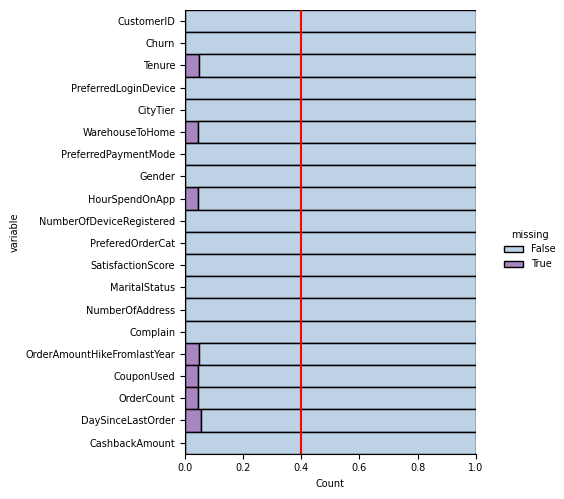

In [3]:
plt.rcParams.update({'font.size': 7})
sns.displot(
    data=customer.isna().melt(value_name='missing'),
    y='variable',
    hue='missing',
    multiple='fill',
    palette='BuPu'
)
# specifying a threshold value
plt.axvline(0.4, color='r')
plt.show()

In [4]:
customer.dropna(axis='index',thresh= 2, inplace=True)


##### Categorical Variables Data Quality 

- Group long tail categories together. One transformation that you would want to apply to categorical variables but not continuous variables is grouping long tail categories together. Long tail categories are sparse categories that do not have many observations belonging to them. If there is not enough data to make meaningful inference on these long tail categories, it often makes sense to group them together into a ‘other’ category.

In [5]:
def categoryCol(row, color='pink'):
    attr= 'background-color: {}'.format(color)
    if row.Num_Unique_Values <10 and row.Data_Type != 'object':
        return [attr]*len(row)
    else:
        None
        
unique_counts = pd.DataFrame.from_records([(col, customer[col].dtype, customer[col].nunique()) for col in customer.columns],
                          columns=['Column_Name','Data_Type', 'Num_Unique_Values']).sort_values(by=['Num_Unique_Values'])
unique_counts.style.apply(categoryCol, axis=1)

,Column_Name,Data_Type,Num_Unique_Values
1,Churn,int64,2
14,Complain,int64,2
7,Gender,object,2
3,PreferredLoginDevice,object,3
4,CityTier,int64,3
12,MaritalStatus,object,3
11,SatisfactionScore,int64,5
9,NumberOfDeviceRegistered,int64,6
10,PreferedOrderCat,object,6
8,HourSpendOnApp,float64,6


In [6]:
for col in customer:
    if col in ['Churn','Complain','CityTier','SatisfactionScore','NumberOfDeviceRegistered','HourSpendOnApp']:
        customer[col]= customer[col].astype('object')
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   object 
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   object 
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   object 
 9   NumberOfDeviceRegistered     5630 non-null   object 
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   object 
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [7]:
cusCat= customer.select_dtypes(exclude=np.number)    
pd.set_option('max_colwidth', None)
cusCat_df = pd.DataFrame.from_records([(col, cusCat[col].dtype, cusCat[col].nunique(), cusCat[col].unique().tolist()) for col in cusCat.columns],
                          columns=['Column_Name','Data_Type', 'Num_Unique_Values', 'Unique Values']).sort_values(by=['Num_Unique_Values'])
cusCat_df

,Column_Name,Data_Type,Num_Unique_Values,Unique Values
0,Churn,object,2,"[1, 0]"
4,Gender,object,2,"[Female, Male]"
10,Complain,object,2,"[1, 0]"
1,PreferredLoginDevice,object,3,"[Mobile Phone, Phone, Computer]"
2,CityTier,object,3,"[3, 1, 2]"
9,MaritalStatus,object,3,"[Single, Divorced, Married]"
8,SatisfactionScore,object,5,"[2, 3, 5, 4, 1]"
5,HourSpendOnApp,object,6,"[3.0, 2.0, nan, 1.0, 0.0, 4.0, 5.0]"
6,NumberOfDeviceRegistered,object,6,"[3, 4, 5, 2, 1, 6]"
7,PreferedOrderCat,object,6,"[Laptop & Accessory, Mobile, Mobile Phone, Others, Fashion, Grocery]"


In [8]:
#Mobile phone, mobile, and phone are both same, so merged 
cusCat.loc[cusCat['PreferredLoginDevice']== 'Phone', 'PreferredLoginDevice'] = 'Mobile Phone'
cusCat.loc[cusCat['PreferedOrderCat']== 'Mobile', 'PreferedOrderCat'] = 'Mobile Phone'
#Replacing cod with Cash on Delivery
cusCat['PreferredPaymentMode']= np.where(cusCat['PreferredPaymentMode']== 'COD', 'Cash on Delivery', cusCat['PreferredPaymentMode'])
#Replacing cc with Credict card using lambda function 
cusCat['PreferredPaymentMode']= cusCat['PreferredPaymentMode'].apply(lambda x: 'Credit Card' if x=='CC' else x)
#merged back to the customer dataset 
customer.update(cusCat, join='left', overwrite= True)

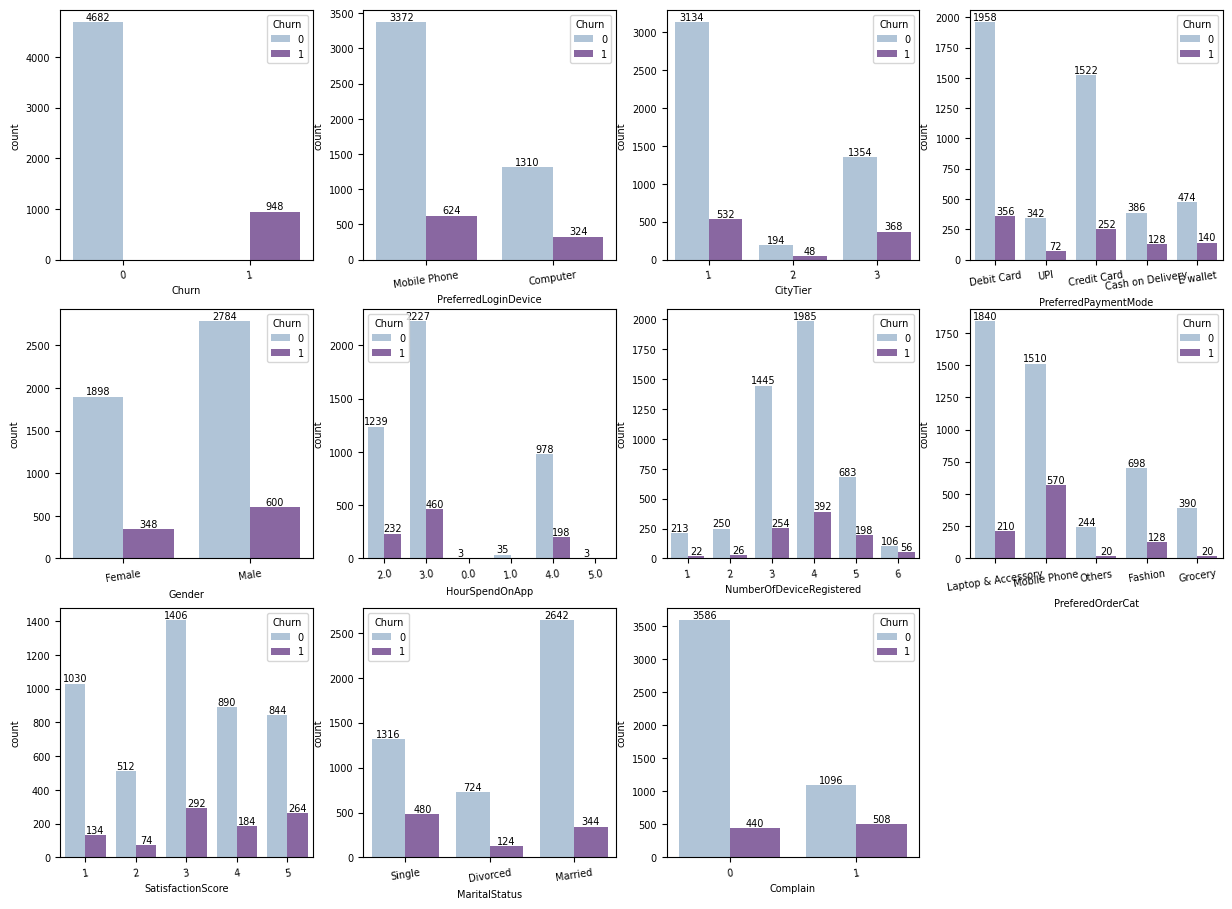

In [9]:
plt.rcParams.update({'font.size': 7})
fig, axes= plt.subplots(nrows=3,ncols=4, figsize=(15,11))
for i, subplots in zip(cusCat, axes.flatten()):
    g=sns.countplot(x=cusCat[i], hue= cusCat['Churn'], ax= subplots, palette='BuPu')
    for container in g.containers:
        g.bar_label(container)
    g.tick_params(axis='x',rotation=8.5)
for subplots in axes.flatten()[len(cusCat.columns):]:
    subplots.remove()
plt.show()

### Numeric Variables 
1. missing value 
2. outlier detection 
3. normalization 
not used for now, since decision tree can handle missing value and skewed data

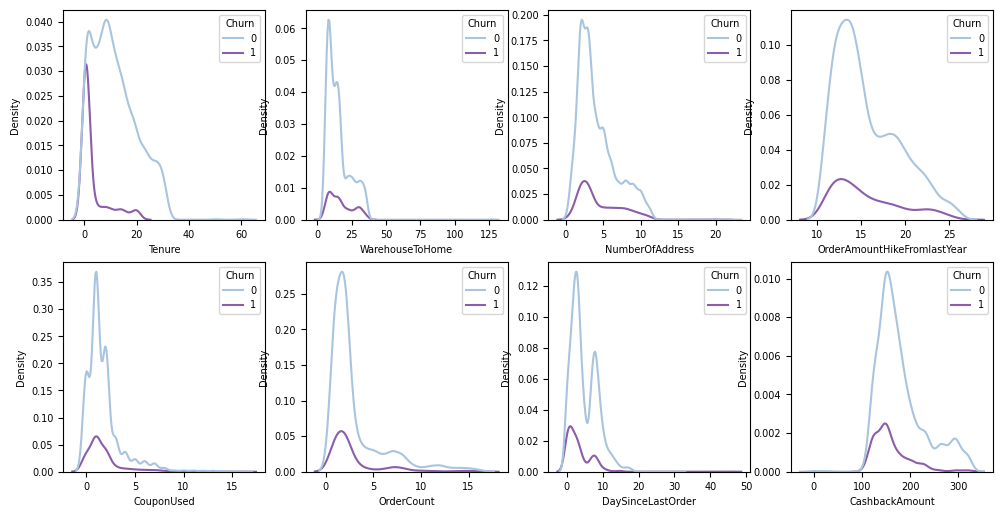

In [13]:
plt.rcParams.update({'font.size': 7})
fig, axes= plt.subplots(nrows=2,ncols=4, figsize=(12,6))
numCus= customer.select_dtypes(include=np.number).drop('CustomerID', axis=1)
for i, subplots in zip(numCus, axes.flatten()):
    sns.kdeplot(x=numCus[i], hue=customer['Churn'],ax= subplots, palette='BuPu')
for subplots in axes.flatten()[len(numCus.columns):]:
    subplots.remove()
plt.show()